In [26]:
custom_models = [VGG11Binary(), VGG13Binary(), VGG16Binary(), VGG19Binary()]

VGG11Binary
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       545
           1       0.91      0.91      0.91       545

    accuracy                           0.91      1090
   macro avg       0.91      0.91      0.91      1090
weighted avg       0.91      0.91      0.91      1090



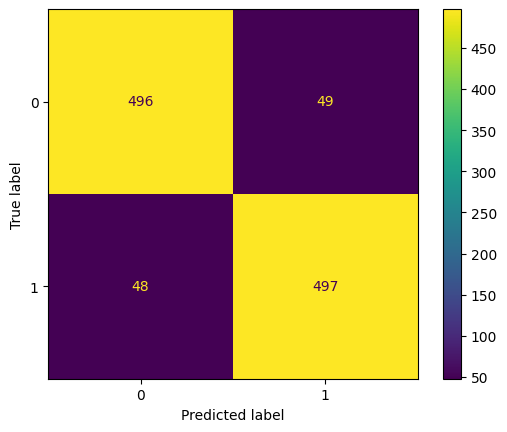

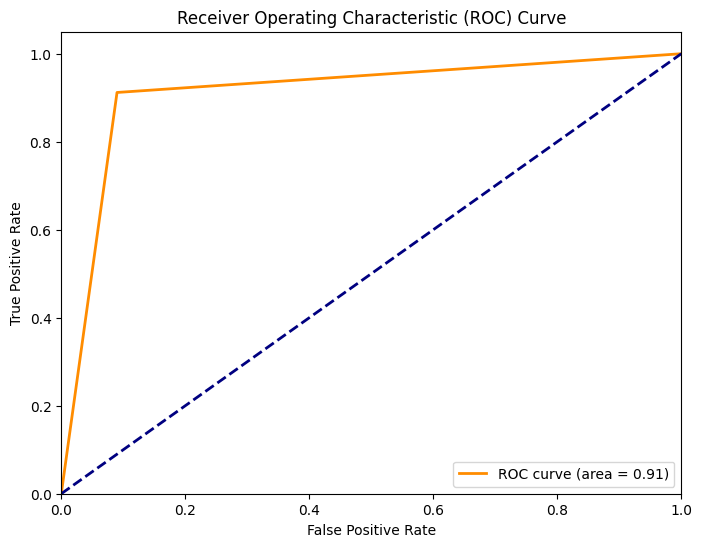

VGG13Binary
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       545
           1       0.91      0.92      0.92       545

    accuracy                           0.91      1090
   macro avg       0.91      0.91      0.91      1090
weighted avg       0.91      0.91      0.91      1090



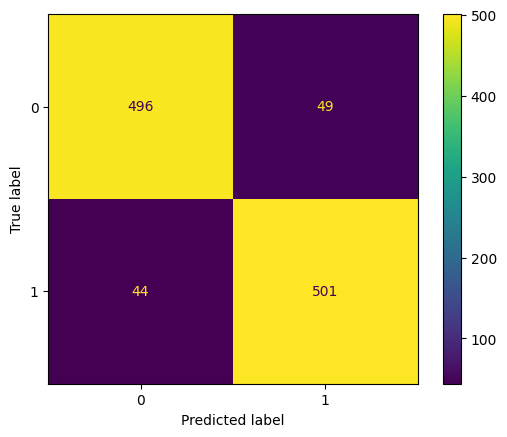

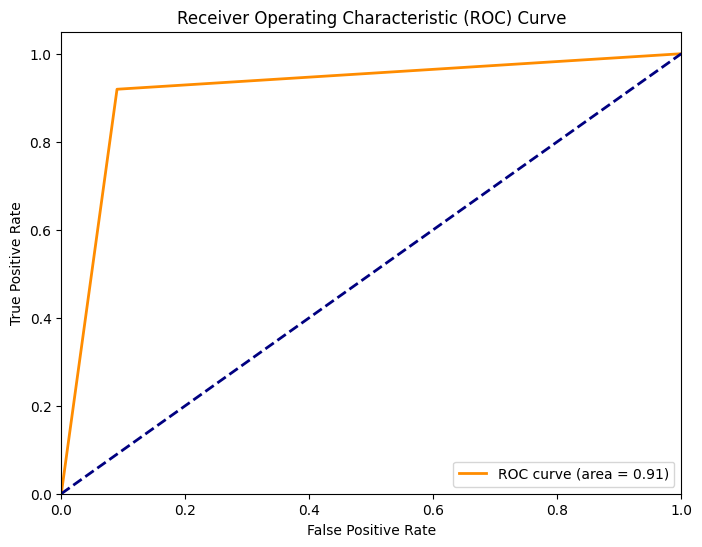

VGG16Binary
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       545
           1       0.91      0.91      0.91       545

    accuracy                           0.91      1090
   macro avg       0.91      0.91      0.91      1090
weighted avg       0.91      0.91      0.91      1090



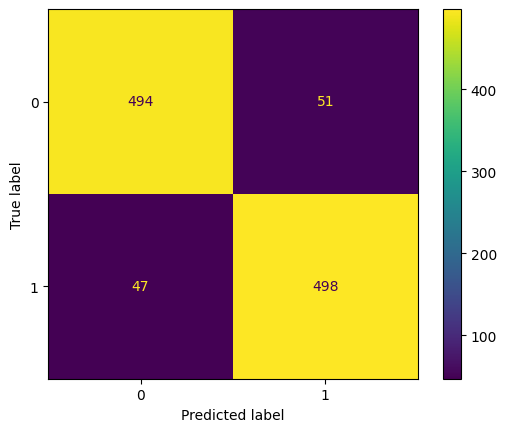

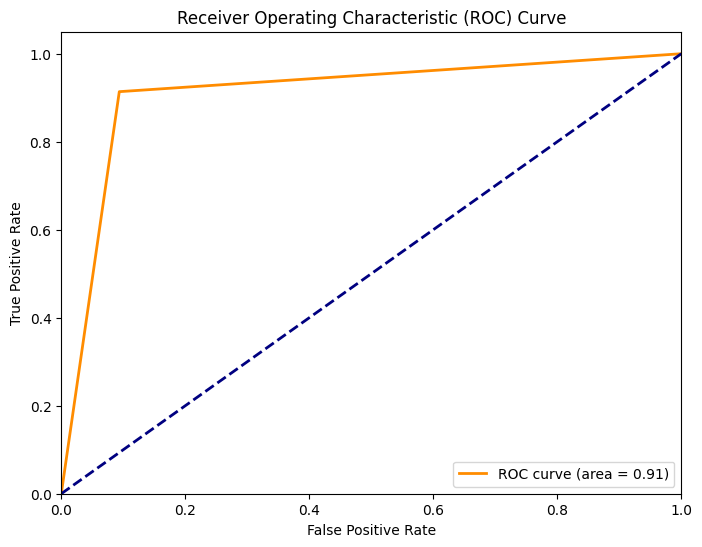

VGG19Binary
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       545
           1       0.92      0.91      0.91       545

    accuracy                           0.91      1090
   macro avg       0.91      0.91      0.91      1090
weighted avg       0.91      0.91      0.91      1090



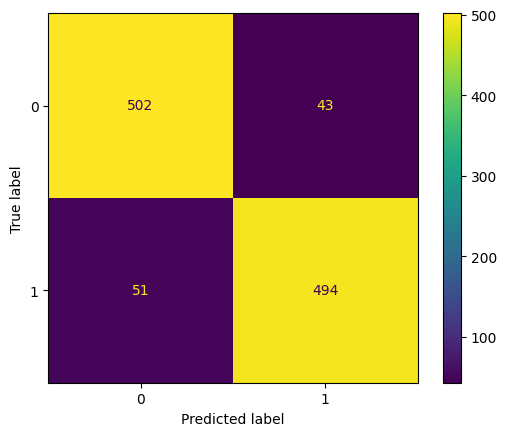

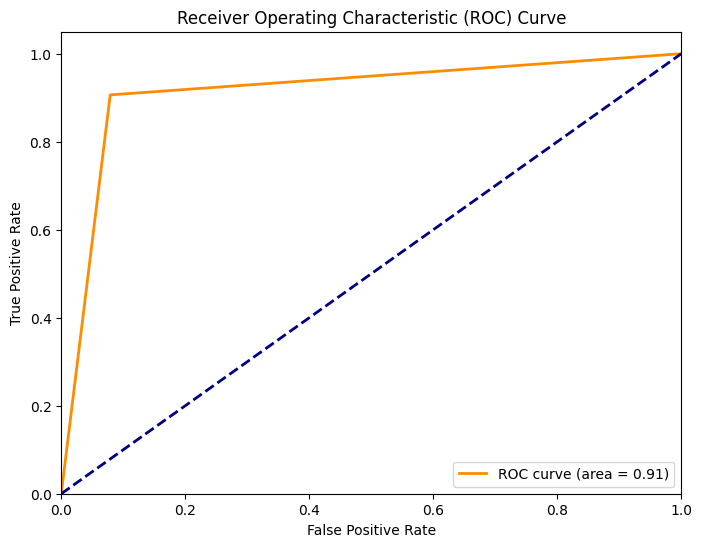

In [36]:
for item in custom_models:
    
    train_log = []
    valid_log = []
    
    model = item
    model = nn.DataParallel(model)
    model = model.to(device)
    criterion = nn.BCEWithLogitsLoss()

    model_class_name = type(item).__name__
    weight_path = f"weights/{model_class_name}.pt"

    test_prediction = []
    test_label = []
    
    model.load_state_dict(load(weight_path))
    model.eval()
        
    with inference_mode():
        for step, batch in enumerate(test):
            img, label = batch
            img, label = img.to(device), label.to(device)
        
            prob = model(img)
            out = round(sigmoid(prob))
        
            loss = criterion(prob.squeeze(1), label.to(float32))
        
            test_prediction.extend(out.detach().cpu().tolist())
            test_label.extend(label.detach().cpu().tolist())

    print(model_class_name)
    print(classification_report(test_label, test_prediction))

    cm = confusion_matrix(test_label, test_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
        
    fpr, tpr, thresholds = roc_curve(test_label, test_prediction)
        
    roc_auc = auc(fpr, tpr)
        
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
        

**Kesimpulan**: AUCROC Curve daripada model VGG Binary tidak memberikan gambaran terhadap model yang lebih baik. Berdasarkan terhadap metrik-metrik, akurasi setiap model adalah 91%. Sehingga, tidak terdapat perbedaan yang significant terhadap model VGG Binary yang lebih baik untuk digunakan.